# Project : Credit Card Fraud Detection 

## Problem Statement
Credit card fraud results in significant financial losses each year. Detecting fraudulent transactions early is critical to prevent loss for both consumers and businesses.
The challenge is that fraudulent transactions are extremely rare compared to legitimate transactions (highly imbalanced dataset).


## Solution 

Build a Machine Learning model that detects fraudulent transactions with high accuracy, while minimizing false positives.

## Goals
Predict if a transaction is fraudulent based on anonymized features (from PCA), Time, and Amount.

Handle class imbalance effectively to improve recall (catching fraud) without inflating false positives.

Evaluate model performance using appropriate metrics (not just accuracy).

### Data
- source : Kaggle : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler
# model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
# model evaluation 
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('creditcard.csv')
df = data.copy()

In [35]:
# Display first few rows
print("First 5 rows of the dataset: \n")
print(df.head())

First 5 rows of the dataset: 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [36]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))


Missing values per column:
Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64


In [10]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

### Exploratory Data Analysis (EDA)

#### Goals:
- Understand data
- Check class imbalance
- Visualize key patterns

In [9]:
# Basic info
print(df.shape)
print(df.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [39]:
# Check class distribution
print("\nClass Distribution: \n")
print(df['Class'].value_counts())


Class Distribution: 

Class
0    284315
1       492
Name: count, dtype: int64


In [40]:
# Check class distribution
print(f"Percentage of fraudulent transactions: {(df['Class'].value_counts()[1] / df['Class'].count() * 100):.4f}%")

Percentage of fraudulent transactions: 0.1727%


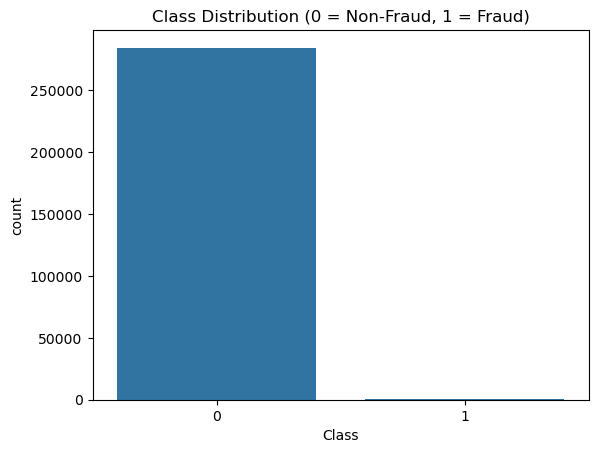

In [12]:
# Plot class imbalance(class distribution)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

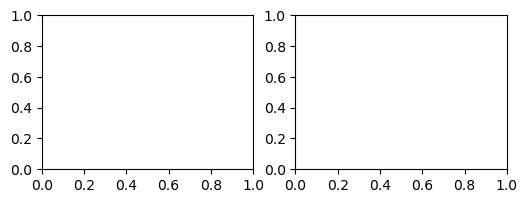

In [48]:
# Visualize 'Time' and 'Amount' features
fig, ax = plt.subplots(1, 2, figsize=(6, 2))

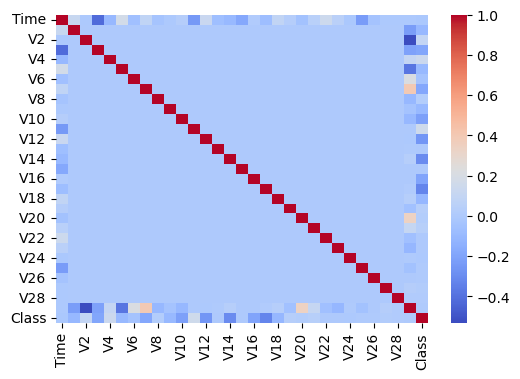

In [15]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

# Data Preprocessing
- Scale Amount and Time
- Split train/test
- Handle imbalance with SMOTE

In [19]:
# Scale Amount and Time
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [53]:
scaler_amount = RobustScaler()
scaler_time = StandardScaler()

df['scaled_amount'] = scaler_amount.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler_time.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original 'Time' and 'Amount' columns
df = df.drop(['Time', 'Amount'], axis=1)

# Reorder columns to have 'Class' at the end
scaled_features = ['scaled_amount', 'scaled_time'] + [col for col in df.columns if col not in ['Class', 'scaled_amount', 'scaled_time']]
df = df[scaled_features + ['Class']]

print("\nDataFrame after scaling 'Time' and 'Amount' and dropping originals:")
print(df.head())


DataFrame after scaling 'Time' and 'Amount' and dropping originals:
   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -1.996583 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -1.996583  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -1.996562 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -1.996562 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -1.996541 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23

In [18]:
# Features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [55]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [56]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


### Model Building 
We will try Logistic Regression and Random Forest for our project.

In [57]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)

In [58]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [59]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

In [60]:
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### Model Evaluation

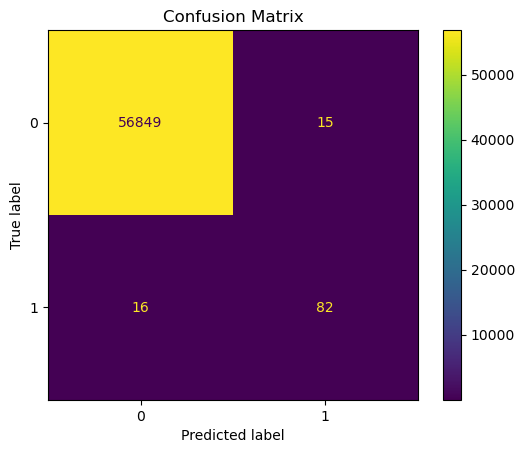

In [61]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

### Hyperparameter Tuning for Random Forest

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [72]:

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    scoring='f1',  # Optimize F1 score
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=77.8min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=17.0min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 7.3min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=35.5min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 9.9min
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 5.6min
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; t

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='f1', verbose=2)

In [88]:
best_rf = rf_random.best_estimator_
best_rf.fit(X_train_res, y_train_res)

# Predictions
y_pred_best = best_rf.predict(X_test)
print("Classification Report (Tuned RF):")
print(classification_report(y_test, y_pred_best))


Classification Report (Tuned RF):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



## Save Model 

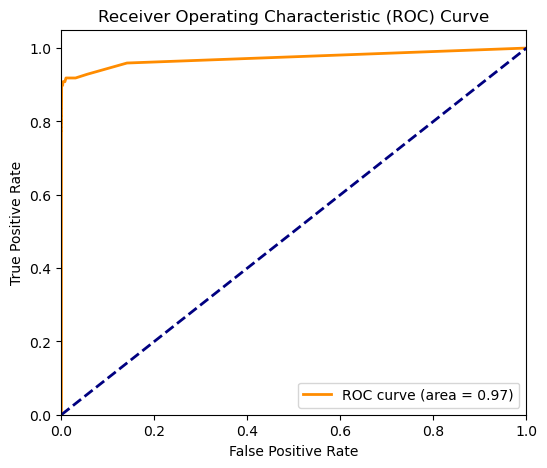

In [68]:
 # ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

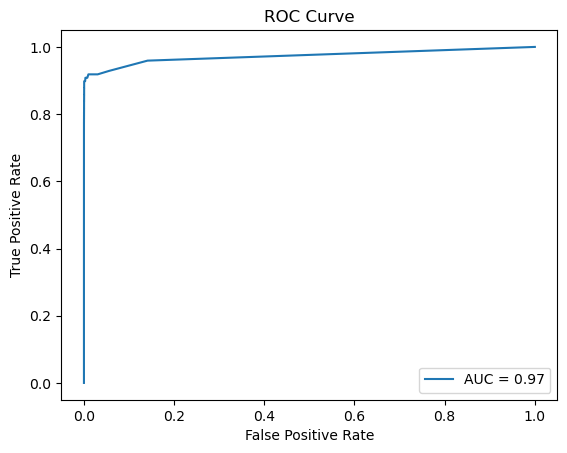

In [32]:
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

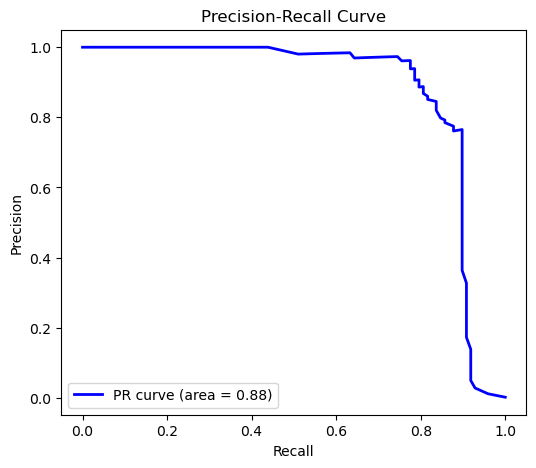

In [65]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [89]:
import joblib
joblib.dump(best_rf, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']